In [1]:
### 0.0 install dependencies
!pip install librosa

In [2]:
# 0.1 import dependencies

import os
import librosa
from librosa import display
import matplotlib.pyplot as plt
import scipy.fft as fft
import pandas as pd

In [3]:
# 0.2 mount drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
# 0.3 import metadata


#root_path = '/content/drive/MyDrive/APS360_Project'
root_path = "/content/gdrive/MyDrive/Year_3/APS360/APS360 Project"

tracks = pd.read_csv(root_path + '/fma_metadata/tracks.csv', header=1, index_col=[0])
# genres = pd.read_csv(root_path + '/fma_metadata/genres.csv')
# features = pd.read_csv(root_path + '/fma_metadata/features.csv')
# echonest = pd.read_csv(root_path + '/fma_metadata/echonest.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
tracks.head()

,comments,date_created,date_released,engineer,favorites,id,information,listens,producer,tags,title,tracks,type,active_year_begin,active_year_end,associated_labels,bio,comments.1,date_created.1,favorites.1,id.1,latitude,location,longitude,members,name,related_projects,tags.1,website,wikipedia_page,split,subset,bit_rate,comments.2,composer,date_created.2,date_recorded,duration,favorites.2,genre_top,genres,genres_all,information.1,interest,language_code,license,listens.1,lyricist,number,publisher,tags.2,title.1
track_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4.0,1.0,<p></p>,6073.0,NaN,[],AWOL - A Way Of Life,7.0,Album,2006-01-01 00:00:00,NaN,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0.0,2008-11-26 01:42:32,9.0,1.0,40.058324,New Jersey,-74.405661,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,['awol'],http://www.AzillionRecords.blogspot.com,NaN,training,small,256000.0,0.0,NaN,2008-11-26 01:48:12,2008-11-26 00:00:00,168.0,2.0,Hip-Hop,[21],[21],NaN,4656.0,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293.0,NaN,3.0,NaN,[],Food
3,0.0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4.0,1.0,<p></p>,6073.0,NaN,[],AWOL - A Way Of Life,7.0,Album,2006-01-01 00:00:00,NaN,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0.0,2008-11-26 01:42:32,9.0,1.0,40.058324,New Jersey,-74.405661,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,['awol'],http://www.AzillionRecords.blogspot.com,NaN,training,medium,256000.0,0.0,NaN,2008-11-26 01:48:14,2008-11-26 00:00:00,237.0,1.0,Hip-Hop,[21],[21],NaN,1470.0,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514.0,NaN,4.0,NaN,[],Electric Ave
5,0.0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4.0,1.0,<p></p>,6073.0,NaN,[],AWOL - A Way Of Life,7.0,Album,2006-01-01 00:00:00,NaN,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0.0,2008-11-26 01:42:32,9.0,1.0,40.058324,New Jersey,-74.405661,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,['awol'],http://www.AzillionRecords.blogspot.com,NaN,training,small,256000.0,0.0,NaN,2008-11-26 01:48:20,2008-11-26 00:00:00,206.0,6.0,Hip-Hop,[21],[21],NaN,1933.0,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151.0,NaN,6.0,NaN,[],This World
10,0.0,2008-11-26 01:45:08,2008-02-06 00:00:00,NaN,4.0,6.0,NaN,47632.0,NaN,[],Constant Hitmaker,2.0,Album,NaN,NaN,"Mexican Summer, Richie Records, Woodsist, Skul...","<p><span style=""font-family:Verdana, Geneva, A...",3.0,2008-11-26 01:42:55,74.0,6.0,NaN,NaN,NaN,"Kurt Vile, the Violators",Kurt Vile,NaN,"['philly', 'kurt vile']",http://kurtvile.com,NaN,training,small,192000.0,0.0,Kurt Vile,2008-11-25 17:49:06,2008-11-26 00:00:00,161.0,178.0,Pop,[10],[10],NaN,54881.0,en,Attribution-NonCommercial-NoDerivatives (aka M...,50135.0,NaN,1.0,NaN,[],Freeway


In [39]:
tracks_genre = tracks[tracks.subset == "small"].filter(["track_id", "genre_top"])
tracks_genre.index.name = "track_id"
tracks_genre.head()

,genre_top
track_id,
2,Hip-Hop
5,Hip-Hop
10,Pop
140,Folk
141,Folk


In [40]:
tracks_genre = tracks[tracks.subset == "small"].filter(["track_id", "genre_top"])
tracks_genre.index.name = "track_id"
print(tracks_genre.head())

# divide tracks into genres

genres = ['Rock', 'Hip-Hop', "Electronic", "Folk"]

tracks_rock = tracks_genre.where(tracks_genre['genre_top'] == 'Rock').dropna()
print(tracks_rock.head())

tracks_hip_hop = tracks_genre.where(tracks_genre['genre_top'] == 'Hip-Hop').dropna()
print(tracks_hip_hop.head())

tracks_elec = tracks_genre.where(tracks_genre['genre_top'] == 'Electronic').dropna()
print(tracks_elec.head())

tracks_folk = tracks_genre.where(tracks_genre['genre_top'] == 'Folk').dropna()
print(tracks_folk.head())

         genre_top
track_id          
2          Hip-Hop
5          Hip-Hop
10             Pop
140           Folk
141           Folk
         genre_top
track_id          
182           Rock
255           Rock
256           Rock
368           Rock
459           Rock
         genre_top
track_id          
2          Hip-Hop
5          Hip-Hop
676        Hip-Hop
694        Hip-Hop
695        Hip-Hop
           genre_top
track_id            
1482      Electronic
3573      Electronic
4519      Electronic
4520      Electronic
4521      Electronic
         genre_top
track_id          
140           Folk
141           Folk
190           Folk
193           Folk
194           Folk


In [41]:
len(tracks_rock)

1000

In [42]:
len(tracks_hip_hop)

1000

In [43]:
len(tracks_elec)

1000

In [44]:
len(tracks_folk)

1000

In [67]:
def get_mp3_path(tracks_genre, id):
  track_num = tracks_genre.iloc[id].name
  filename = (6-len(track_num))*'0' + track_num
  mp3_path = "/" + filename[:3] + "/" + filename + ".mp3"
  return mp3_path

In [68]:
get_mp3_path(tracks_elec, 0)

'/001/001482.mp3'

Getting spectograms for Rock genre...


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


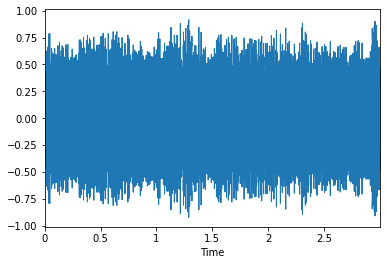

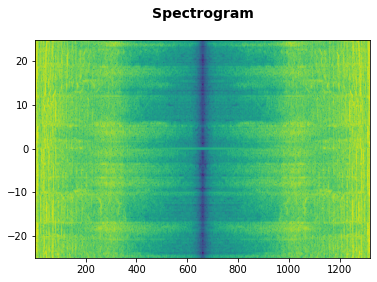

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


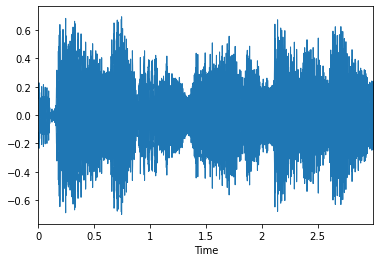

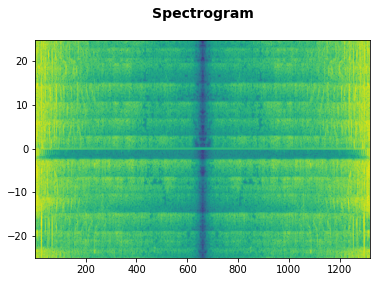

Getting spectograms for Hip-Hop genre...


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


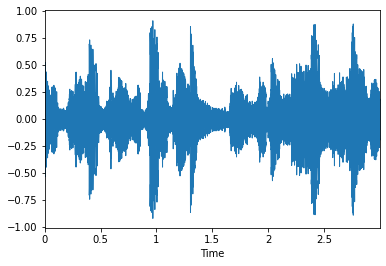

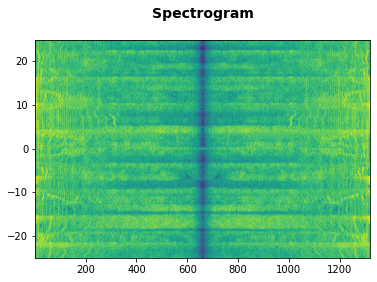

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


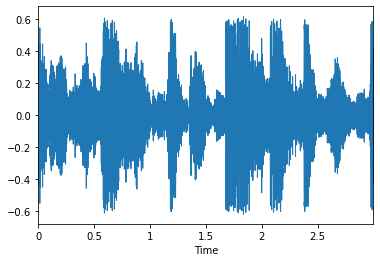

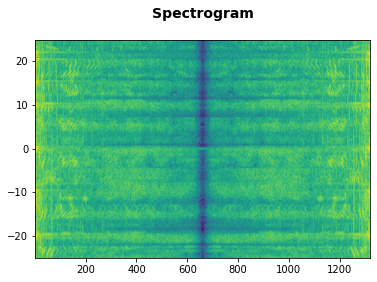

Getting spectograms for Electronic genre...


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


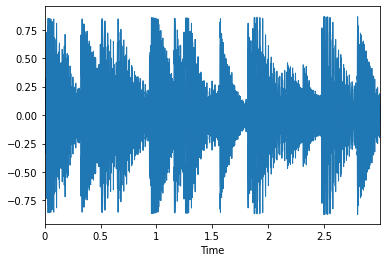

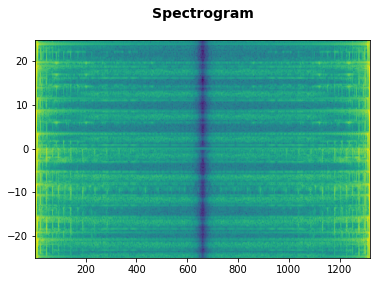

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


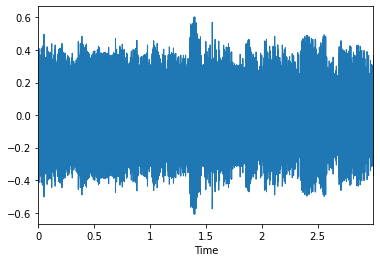

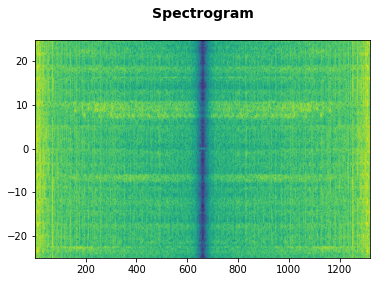

Getting spectograms for Folk genre...


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


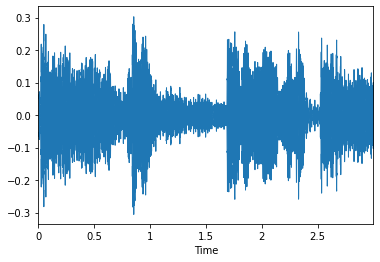

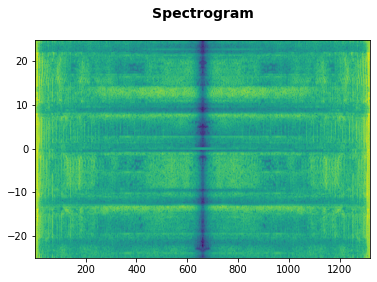

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


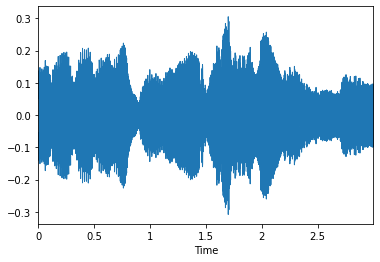

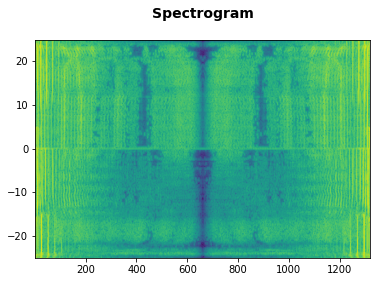

In [77]:
mp3_root = root_path + '/fma_small'

tracks_genres = [tracks_rock, tracks_hip_hop, tracks_elec, tracks_folk]

for track_genre in tracks_genres:
  print(f"Getting spectograms for {track_genre.genre_top.iloc[0]} genre...")
  for i in range(2):
    mp3_file = get_mp3_path(track_genre, i)
    samples, s_rate = librosa.load(mp3_root + mp3_file, mono=True, offset=10.0, duration=3.0)

    # OPTIONAL: plot soundwaves
    plt.figure()
    librosa.display.waveplot(y = samples, sr = s_rate)
    plt.show()

    ### 2.0 fourier transform
    song_fft = fft.fft(samples)

    ### 3.0 plot spectogram
    plt.specgram(song_fft, Fs = 50)
    plt.title('Spectrogram\n', 
              fontsize = 14, fontweight ='bold')
    plt.show()


In [ ]:
### 1.0 open directory with .mp3 files
mp3_root = root_path + '/fma_small'

for i in range(len(tracks_rock)):
  # get track_id num
  rock_track_id = tracks_rock.iloc[i]

  mp3_file = '/000/000002.mp3'
# 1.1 load and transform .mp3 file
samples, s_rate = librosa.load(mp3_root + mp3_file, mono=True, offset=10.0, duration=3.0)


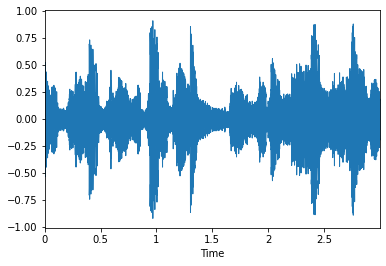

In [ ]:
# OPTIONAL: plot soundwaves
plt.figure()
librosa.display.waveplot(y = samples, sr = s_rate)
plt.show()

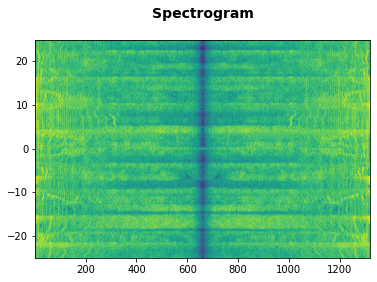

In [ ]:
### 2.0 fourier transform
song_fft = fft.fft(samples)

### 3.0 plot spectogram

plt.specgram(song_fft, Fs = 50)
plt.title('Spectrogram\n', 
          fontsize = 14, fontweight ='bold')
plt.show()

In [ ]:
### 4.0 cropping spectogram

# .png
# crop and resize -> 128x128

In [ ]:
# ALT SPECTOGRAM (which is sus =( ... sad)

f, t, Sxx = scipy.signal.spectrogram(song_fft, fs=50, )
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()


In [ ]:
### 5.0 exporting spectogram

master_path = root_path + "/spectograms"